<a href="https://colab.research.google.com/github/AnandDaksh/AnandDaksh/blob/main/(ResNet)cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [19]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

KeyboardInterrupt: 

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

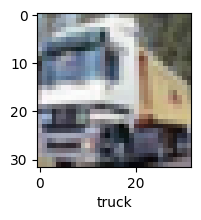

In [10]:
plot_sample(X_train, y_train, 1)

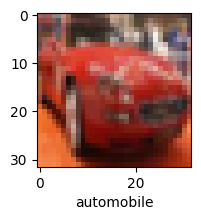

In [11]:
plot_sample(X_train, y_train, 5)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 161s 102ms/step - loss: 1.8134 - accuracy: 0.3542
Epoch 2/2
1563/1563 [==============================] - 162s 104ms/step - loss: 1.6214 - accuracy: 0.4287


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.49      0.51      1000
           1       0.58      0.53      0.55      1000
           2       0.40      0.21      0.27      1000
           3       0.27      0.53      0.36      1000
           4       0.45      0.31      0.37      1000
           5       0.55      0.17      0.27      1000
           6       0.58      0.35      0.44      1000
           7       0.34      0.69      0.45      1000
           8       0.63      0.53      0.57      1000
           9       0.47      0.58      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.43     10000
weighted avg       0.48      0.44      0.43     10000



In [16]:
!pip install tensorflow matplotlib seaborn

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [ ]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Load the pre-trained ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)


In [ ]:

# Create the model
resnet_model = Model(inputs=base_model.input, outputs=output)

In [ ]:

# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
# Train the model
resnet_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 206s 129ms/step - loss: 2.3079 - accuracy: 0.0999
Epoch 2/20
1563/1563 [==============================] - 195s 125ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 3/20
1563/1563 [==============================] - 196s 125ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 4/20
1563/1563 [==============================] - 198s 126ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 5/20
1563/1563 [==============================] - 196s 125ms/step - loss: 2.3028 - accuracy: 0.0963
Epoch 6/20
1563/1563 [==============================] - 197s 126ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 7/20
1563/1563 [==============================] - 195s 125ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 8/20
1563/1563 [==============================] - 195s 125ms/step - loss: 2.3027 - accuracy: 0.0978
Epoch 9/20
1563/1563 [==============================] - 196s 125ms/step - loss: 2.3028 - accuracy: 0.0995
Epoch 10/20
1563/1563 [=======================

In [ ]:
# Evaluate the model
resnet_model.evaluate(X_test, y_test)

313/313 [==============================] - 41s 126ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026323318481445, 0.10000000149011612]

In [ ]:
# Make predictions on the test data
y_pred = np.argmax(resnet_model.predict(X_test), axis=-1)

In [ ]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Calculate accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

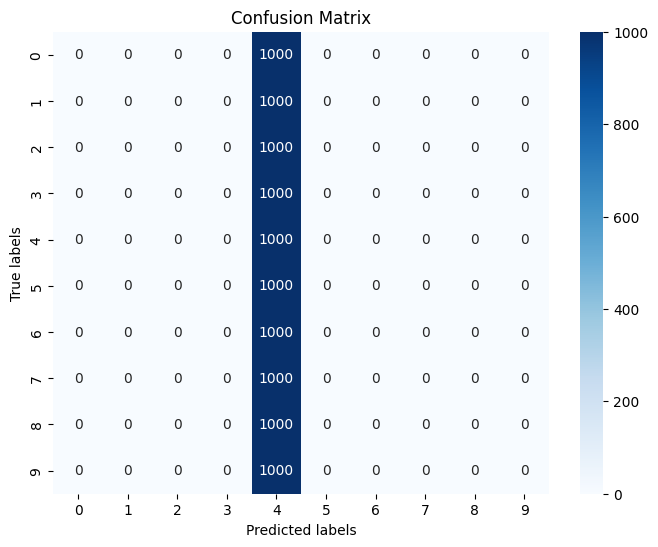

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Function to plot a sample image from the test set
def plot_sample(X, y, index):
    plt.figure(figsize=(5, 2))
    plt.imshow(X[index])
    plt.title(f'Class: {classes[y[index]]}')

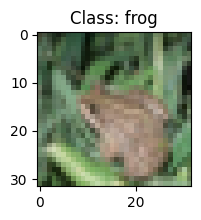

In [ ]:

# Plot a sample image
plot_sample(X_test, y_test, 4)

In [ ]:
# Get predicted class label
predicted_class = np.argmax(resnet_model.predict(np.expand_dims(X_test[3], axis=0)))

# Print predicted class label
print(classes[predicted_class])

NameError: name 'X_test' is not defined

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

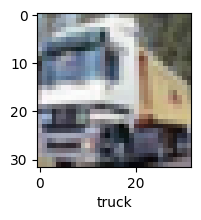

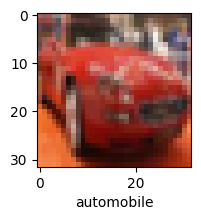

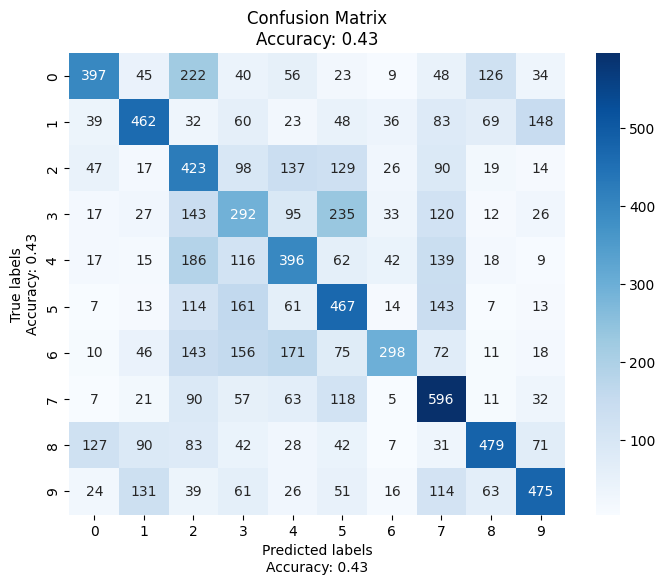

airplane


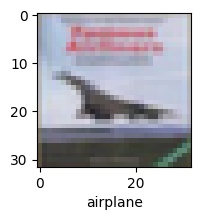

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

X_test.shape

y_train.shape

y_train[:5]

y_train = y_train.reshape(-1,)
y_train[:5]

y_test = y_test.reshape(-1,)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 1)

plot_sample(X_train, y_train, 5)

X_train = X_train / 255.0
X_test = X_test / 255.0

!pip install tensorflow matplotlib seaborn

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

# Assuming you have X_train, y_train, X_test, and y_test loaded appropriately

# Load the ResNet50 model without the top classification layer and with pretrained weights on imagenet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your custom classification layers
x = layers.Flatten()(resnet.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

# Create the model
resnet_model = models.Model(resnet.input, output)

# Compile the model
resnet_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Print model summary
resnet_model.summary()

# Fit the model
history = resnet_model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

# Evaluate the model
resnet_model.evaluate(X_test, y_test)

# Make predictions on the test data
y_pred = np.argmax(resnet_model.predict(X_test), axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

# Plot confusion matrix with accuracy
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy:.2f}')
plt.ylabel(f'True labels\nAccuracy: {accuracy:.2f}')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()

# Plot a sample image from the test set
plot_sample(X_test, y_test, 3)

# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print(predicted_class_name)
